## 데이터 처리 환경설정

In [346]:
import pandas as pd
import openpyxl
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt 

from sklearn.linear_model import LinearRegression
import datetime as dt
import numpy as np
import cv2

import datetime as dt
import time

In [347]:
pd.set_option('display.float_format', None)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

### 데이터 불러오기
* 개인정보 유출 때문에 개인 폴더에서 통일화 작업을 하고 불러옴

개인정보 유출 때문에 개인 폴더에서 통일화 작업을 하고 불러옴

In [348]:
df_sam1_ori = pd.read_csv('./sample1.csv')
df_sam2_ori = pd.read_csv('./sample2.csv')

In [349]:
df_sam1 = df_sam1_ori.copy()
df_sam2 = df_sam2_ori.copy()

In [350]:
df_sam1.head()

,PID,AGE,Eye,Exam Date,Exam ID,Pupil diameter,False positive percent,False negative percent,Fixation loss,Fixation trial,Exam duration(min),GHT,MD,MD probability,PSD,PSD probability,VFI,PDP_01,PDP_02,PDP_03,PDP_04,PDP_05,PDP_06,PDP_07,PDP_08,PDP_09,PDP_10,PDP_11,PDP_12,PDP_13,PDP_14,PDP_15,PDP_16,PDP_17,PDP_18,PDP_19,PDP_20,PDP_21,PDP_22,PDP_23,PDP_24,PDP_25,PDP_26,PDP_27,PDP_28,PDP_29,PDP_30,PDP_31,PDP_32,PDP_33,...,TDV_05,TDV_06,TDV_07,TDV_08,TDV_09,TDV_10,TDV_11,TDV_12,TDV_13,TDV_14,TDV_15,TDV_16,TDV_17,TDV_18,TDV_19,TDV_20,TDV_21,TDV_22,TDV_23,TDV_24,TDV_25,TDV_26,TDV_27,TDV_28,TDV_29,TDV_30,TDV_31,TDV_32,TDV_33,TDV_34,TDV_35,TDV_36,TDV_37,TDV_38,TDV_39,TDV_40,TDV_41,TDV_42,TDV_43,TDV_44,TDV_45,TDV_46,TDV_47,TDV_48,TDV_49,TDV_50,TDV_51,TDV_52,TDV_53,TDV_54
0,1,71,OD,2005-03-18 오후 12:57:56,NaN,2.8,5,41,1,14,5,3,-16.11,5,8.77,5,63,4,4,4,4,1,4,4,4,4,4,4,4,4,0,0,1,4,0,0,2,0,0,0,0,0,NaN,3,3,4,0,0,0,0,...,-10,-23,-30,-23,-33,-24,-31,-18,-17,-3,-9,-11,-28,-5,-5,-13,-5,-7,-7,-6,-9,NaN,-14,-13,-18,-10,-10,-7,-6,-15,NaN,-12,-7,-18,-19,-8,-12,-29,-31,-23,-21,-7,-31,-10,-21,-9,-16,-19,-18,-24
1,1,71,OS,2005-03-18 오후 1:08:41,NaN,0.0,5,24,1,13,4,3,-13.60,5,7.03,5,58,4,4,4,4,4,3,0,0,4,1,0,3,4,4,0,4,3,4,2,4,1,2,4,3,4,NaN,4,4,4,4,4,4,4,...,-26,-13,-3,-7,-21,-13,-3,-11,-15,-19,-9,-18,-17,-17,-12,-22,-11,-12,-19,-11,-17,NaN,-15,-14,-15,-15,-23,-13,-24,-32,NaN,-19,-15,-24,-19,-31,-3,-19,-17,-8,-11,-6,-16,-14,-8,-7,-1,-3,-3,-12


In [351]:
df_sam2.head(5)

,PID,AGE,Eye,Exam Date,Exam ID,Pupil diameter,False positive percent,False negative percent,Fixation loss,Fixation trial,Exam duration(min),GHT,MD,MD probability,PSD,PSD probability,VFI,PDP_01,PDP_02,PDP_03,PDP_04,PDP_05,PDP_06,PDP_07,PDP_08,PDP_09,PDP_10,PDP_11,PDP_12,PDP_13,PDP_14,PDP_15,PDP_16,PDP_17,PDP_18,PDP_19,PDP_20,PDP_21,PDP_22,PDP_23,PDP_24,PDP_25,PDP_26,PDP_27,PDP_28,PDP_29,PDP_30,PDP_31,PDP_32,PDP_33,...,TDV_05,TDV_06,TDV_07,TDV_08,TDV_09,TDV_10,TDV_11,TDV_12,TDV_13,TDV_14,TDV_15,TDV_16,TDV_17,TDV_18,TDV_19,TDV_20,TDV_21,TDV_22,TDV_23,TDV_24,TDV_25,TDV_26,TDV_27,TDV_28,TDV_29,TDV_30,TDV_31,TDV_32,TDV_33,TDV_34,TDV_35,TDV_36,TDV_37,TDV_38,TDV_39,TDV_40,TDV_41,TDV_42,TDV_43,TDV_44,TDV_45,TDV_46,TDV_47,TDV_48,TDV_49,TDV_50,TDV_51,TDV_52,TDV_53,TDV_54
0,264,26,OD,2008-11-26 오후 4:38:34,NaN,0.0,1,4,2,19,7,3,-4.46,4,6.73,5,91,0,0,0,0,0,1,4,0,0,1,4,0,0,0,0,0,0,0,0,4,0,0,0,0,0,NaN,4,0,0,0,1,1,0,...,0,-5,-14,0,-3,-4,-27,1,-1,-1,0,0,-3,-2,-4,-20,-4,-5,-5,-3,-2,NaN,-33,-3,-3,-3,-5,-6,-3,-3,NaN,-4,-4,-3,-1,-3,-2,-4,-3,-3,-2,-3,-3,-3,-4,-3,-2,-3,-2,-4
1,264,26,OS,2008-11-04 오후 4:14:53,NaN,0.0,0,0,0,21,8,3,-13.01,5,14.83,5,67,4,4,4,4,4,4,4,4,4,4,4,3,0,4,4,0,4,4,0,4,4,0,0,0,0,NaN,4,0,0,0,4,0,0,...,-33,-34,-21,-31,-33,-35,-28,-27,-11,-29,-23,-3,-33,-33,-1,-12,-32,-4,-2,-4,-6,NaN,-31,-3,-2,-3,-31,-3,-4,-6,NaN,-5,-8,-5,-7,-7,-6,-3,-4,-3,-2,-3,-3,-3,1,-2,-5,-2,-2,-7
2,264,26,OD,2008-11-04 오후 4:05:13,NaN,0.0,1,0,0,19,7,3,-4.42,4,7.31,5,89,0,0,0,0,0,0,4,2,0,0,4,0,0,0,0,0,1,0,0,4,0,0,0,1,0,NaN,4,1,0,1,2,0,1,...,-3,0,-16,-8,-1,0,-14,-3,0,1,0,0,-5,-1,-3,-35,-2,-4,-3,-4,-3,NaN,-33,-4,-2,-4,-6,-5,-4,-6,NaN,-4,-4,-5,-3,-5,-3,-4,-4,-8,-5,-2,-2,-2,-7,-4,-2,-1,-2,-2
3,264,26,OS,2008-11-03 오후 4:40:56,NaN,0.0,0,6,0,20,8,3,-13.83,5,14.23,5,67,4,4,4,4,4,4,4,4,4,4,3,2,0,4,1,3,4,4,0,3,4,0,0,0,0,NaN,4,0,0,0,4,0,0,...,-33,-34,-27,-31,-33,-35,-10,-18,-4,-31,-11,-18,-33,-33,-4,-9,-28,-6,-3,-5,-6,NaN,-33,-3,-4,-4,-21,-4,-5,-5,NaN,-5,-3,-5,-7,-4,-5,-8,-8,-12,-3,-3,-3,-4,-11,-8,-9,-6,-5,-6
4,264,26,OD,2008-11-03 오후 4:12:10,NaN,0.0,0,8,0,17,6,3,-7.88,5,8.42,5,85,0,0,0,0,0,0,0,0,4,4,1,0,4,4,4,0,0,1,0,0,4,0,0,0,0,NaN,4,0,0,0,4,0,0,...,-1,-4,-4,-3,-35,-19,-8,-5,-13,-19,-15,-6,-2,-7,-1,-3,-35,-4,-5,-5,-6,NaN,-33,-6,-4,-3,-12,-5,-6,-5,NaN,-7,-4,-4,-10,-5,-4,-9,-6,-3,-4,-3,-11,-3,-4,-7,-5,-5,-7,-8


* 검진 날짜를 datetime으로 바꿔줌 (정렬을 위해)
    * PID별, 연령별, 검진날짜 별로 정렬

In [352]:
df_sam2['Exam Date'] = pd.to_datetime(df_sam2['Exam Date'].apply(lambda x: x[:10]+' '+str(int(x[-7:-6])+12)+x[-6:] if '오후' in x else x[:10]+' '+x[-8:]))

In [353]:
df_sam2 = df_sam2.sort_values(['PID', 'AGE','Exam Date'], ascending = [True, True, False]).copy()

## 의문 데이터
* 같은 날 같은 눈을 2번 검사한 데이터가 있음
    * 검사결과가 이상할 경우 한번 더 검진한다고 함. 고로 16일 이내에 같은 검사를 했을 경우 최신 데이터만 쓰기로 함

In [302]:
df_sort2.groupby(['PID','AGE','Eye']).count()['Exam Date'].unique()

array([1, 2, 3, 6, 5, 4], dtype=int64)

* 제거할 인덱스를 뽑아내는 과정

In [319]:
pid_list = list(df_sort2['PID'].unique())

In [311]:
st_time = time.time()
ft = 0

err_list = [[] for i in range(3)]
qna_list = []
ind_list = []

for i in pid_list:
    for j in df_sort2['AGE'].unique():
        for k in df_sort2['Eye'].unique():
            df_want = df_sort2[(df_sort2['PID']==i)&(df_sort2['AGE']==j)&(df_sort2['Eye']==k)]
            date_want = df_want['Exam Date'].apply(lambda x : dt.datetime.toordinal(pd.to_datetime(str(x)[:10])))
            if len(df_want)>=2 :
                for m in range(len(df_want)-1):
                    qna_list.append(date_want.iloc[m] - date_want.iloc[m+1])
                    if date_want.iloc[m] - date_want.iloc[m+1] <= 16:
                        err_list[0].append(i)
                        err_list[1].append(j)
                        err_list[2].append(k)
                        ind_list.append(df_want.index[m+1])

    ft += 1
    if ft%10==0 : 
        ed_time = time.time() - st_time
        print('\r남은 갯수 :', ft, '/', len(df_sort2['PID'].unique()), '\t\t남은 시간 :', round((ed_time/ft)*(len(df_sort2['PID'].unique())-ft-1), 2)
             ,'\t\t', end='')

남은 갯수 : 260 / 264 		남은 시간 : 0.6 				

In [316]:
df_sort2.drop(index = ind_list, inplace = True)

In [332]:
want_pid = [[] for i in range(2)]
not_want_ind = []
for i in pid_list:
    for j in df_sort2['Eye'].unique():
        if len(df_sort2[(df_sort2['PID']==i) & (df_sort2['Eye']==j)])<4 :
            for k in df_sort2[(df_sort2['PID']==i) & (df_sort2['Eye']==j)].index:
                not_want_ind.append(k)

In [341]:
df_4 = df_sort2.drop(index = not_want_ind).copy()

In [342]:
df_4

,PID,AGE,Eye,Exam Date,Exam ID,Pupil diameter,False positive percent,False negative percent,Fixation loss,Fixation trial,Exam duration(min),GHT,MD,MD probability,PSD,PSD probability,VFI,PDP_01,PDP_02,PDP_03,PDP_04,PDP_05,PDP_06,PDP_07,PDP_08,PDP_09,PDP_10,PDP_11,PDP_12,PDP_13,PDP_14,PDP_15,PDP_16,PDP_17,PDP_18,PDP_19,PDP_20,PDP_21,PDP_22,PDP_23,PDP_24,PDP_25,PDP_26,PDP_27,PDP_28,PDP_29,PDP_30,PDP_31,PDP_32,PDP_33,...,TDV_05,TDV_06,TDV_07,TDV_08,TDV_09,TDV_10,TDV_11,TDV_12,TDV_13,TDV_14,TDV_15,TDV_16,TDV_17,TDV_18,TDV_19,TDV_20,TDV_21,TDV_22,TDV_23,TDV_24,TDV_25,TDV_26,TDV_27,TDV_28,TDV_29,TDV_30,TDV_31,TDV_32,TDV_33,TDV_34,TDV_35,TDV_36,TDV_37,TDV_38,TDV_39,TDV_40,TDV_41,TDV_42,TDV_43,TDV_44,TDV_45,TDV_46,TDV_47,TDV_48,TDV_49,TDV_50,TDV_51,TDV_52,TDV_53,TDV_54
10,2,51,OS,2010-11-19 10:32:01,NaN,6.4,1,0,0,13,4,2,-0.98,0,1.54,0,98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,0,0,NaN,0,0,3,0,0,0,0,...,-1,1,0,0,2,1,0,-1,0,0,-1,0,-2,0,0,-2,-2,-4,-4,-1,-1,NaN,-1,-1,-6,-2,-1,-1,-2,-3,NaN,1,-2,0,-1,1,-2,-1,1,-1,-1,0,-1,0,-1,0,-3,0,0,0
9,2,51,OD,2010-11-19 10:25:16,NaN,6.4,1,3,0,16,5,1,-1.82,1,1.62,0,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,...,5,1,-3,-2,-4,0,-3,-1,-2,-1,-2,-3,0,-2,0,-2,-2,-3,-3,-3,-3,NaN,-3,-5,-2,-2,-3,-1,-1,-3,NaN,-6,0,-1,-3,-2,-2,-2,-2,-1,0,-2,-2,-3,-1,-1,-1,-2,0,-2
12,2,52,OS,2011-11-11 08:45:17,NaN,0.0,1,0,1,13,4,1,-0.51,0,1.27,0,100,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,...,-1,1,0,-3,-1,0,-1,0,0,-1,1,2,1,0,2,3,-1,0,2,-1,0,NaN,-1,-1,-2,-2,0,-2,-2,1,NaN,0,-1,0,0,2,-1,0,-1,0,-1,-1,-2,-2,-2,-3,-2,-1,2,-1
11,2,52,OD,2011-11-11 08:39:38,NaN,0.0,6,3,1,13,4,1,-0.44,0,1.67,0,99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,NaN,1,1,0,4,0,1,1,...,0,1,1,0,0,3,0,-1,-1,-1,-1,0,0,-3,1,3,-1,2,-1,-2,-2,NaN,-3,-2,-1,-4,-2,-2,-2,1,NaN,0,0,4,2,1,-1,1,0,0,-1,-1,-1,-1,-1,-2,0,1,2,0
16,2,53,OS,2012-10-31 14:58:08,NaN,3.9,0,0,2,14,4,1,-0.85,0,1.63,0,99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,NaN,0,0,0,0,0,0,0,...,1,-1,0,-1,4,1,1,0,0,-1,0,1,0,-2,-3,-2,-1,-1,-2,-1,-5,NaN,-3,-1,0,0,-1,-2,-1,-5,NaN,0,2,-1,-1,-1,0,-1,-4,-1,-1,0,-1,-3,-1,-2,2,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,258,64,OD,2005-02-10 17:30:07,NaN,0.0,2,14,1,18,6,3,-6.44,5,4.07,5,92,0,4,4,0,4,4,0,0,0,0,0,0,0,0,0,4,4,0,0,0,0,0,1,0,1,NaN,3,0,0,4,1,0,0,...,-13,-17,-6,-4,-3,-4,-4,-4,-6,-6,-4,-18,-28,-5,-2,-6,-6,-5,-8,-5,-7,NaN,-11,-3,-6,-10,-8,-6,-2,-7,NaN,-6,-6,-5,-7,-4,-9,-3,-3,-3,-3,-6,-6,-5,-7,-4,-6,-4,-9,-6
982,258,65,OS,2006-09-20 14:05:38,NaN,0.0,0,9,1,16,6,3,-8.97,5,4.30,5,91,0,4,4,0,0,0,1,0,0,0,0,0,0,0,0,4,4,2,2,4,1,0,0,0,0,NaN,3,0,0,0,0,0,0,...,-8,-9,-11,-4,-9,-11,-5,-7,-8,-8,-9,-28,-28,-12,-12,-17,-10,-9,-11,-8,-9,NaN,-14,-7,-8,-8,-10,-8,-7,-9,NaN,-6,-6,-4,-6,-6,-9,-10,-7,-8,-7,-9,-6,-8,-10,-10,-6,-8,-10,-8
983,258,65,OD,2006-09-20 13:58:34,NaN,0.0,1,6,0,16,5,3,-7.17,5,4.55,5,93,0,4,4,0,0,3,0,0,0,0,0,0,0,0,0,4,4,3,0,3,0,0,1,0,0,NaN,0,0,0,0,0,0,0,...,-8,-11,-7,-6,-8,-6,-6,-6,-6,-5,-7,-26,-28,-11,-8,-13,-6,-6,-10,-8,-7,NaN,-4,-7,-7,-7,-5,-7,-5,-5,NaN,-4,-4,-5,-6,-9,-7,-5,-4,-6,-4,-6,-6,-6,-6,-3,-5,-6,-7,-8
980,258,66,OS,2007-10-04 09:19:31,NaN,0.0,3,3,0,14,5,4,-4.21,5,1.68,0,98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,1,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,...,-4,-3,-6,-2,-3,-3,-2,-2,-2,-3,-4,-9,-11,-7,-5,-5,-5,-6,-6,-3,-5,NaN,-3,-5,-3,-3,-5,-4,-2,-5,NaN,-6,-5,-5,-3,-2,-4,-5,-2,-4,-4,-4,-7,-5,-6,-7,-4,-5,-4,-5


In [344]:
# 검사 값들
check_list = ['PDP', 'PDV', 'THV', 'TDP', 'TDV']

## 데이터 이상치 시각화 후 확인
   * THV를 제외한 다른 분야에서는 26, 35번 데이터는 측정이 안되는 것을 확인 - 맹점
   * 특이 데이터는 박사님과 논의
        - PDP, TDP는 P-value에 관한 것이므로 우선 PDV, THV, TDV를 먼저 살펴본다. 그 중에서도 THV를 먼저 살펴본다.
        - THV는 기계에서 환자가 반응한 가장 sensitive한 시표의 밝기
        - TDV는 THV - 일반인들의 평균
            - THV에서 주위의 값들과 다른 추이를 보이는 3개의 point 확인해보기
        - PDV는 TDV + Overall sensitivity
           - TDV의 같은 값이라도 시야의 위치에 따라 다를 수 있음, 센터가 중요

**3 X 1 그래프**


PDP


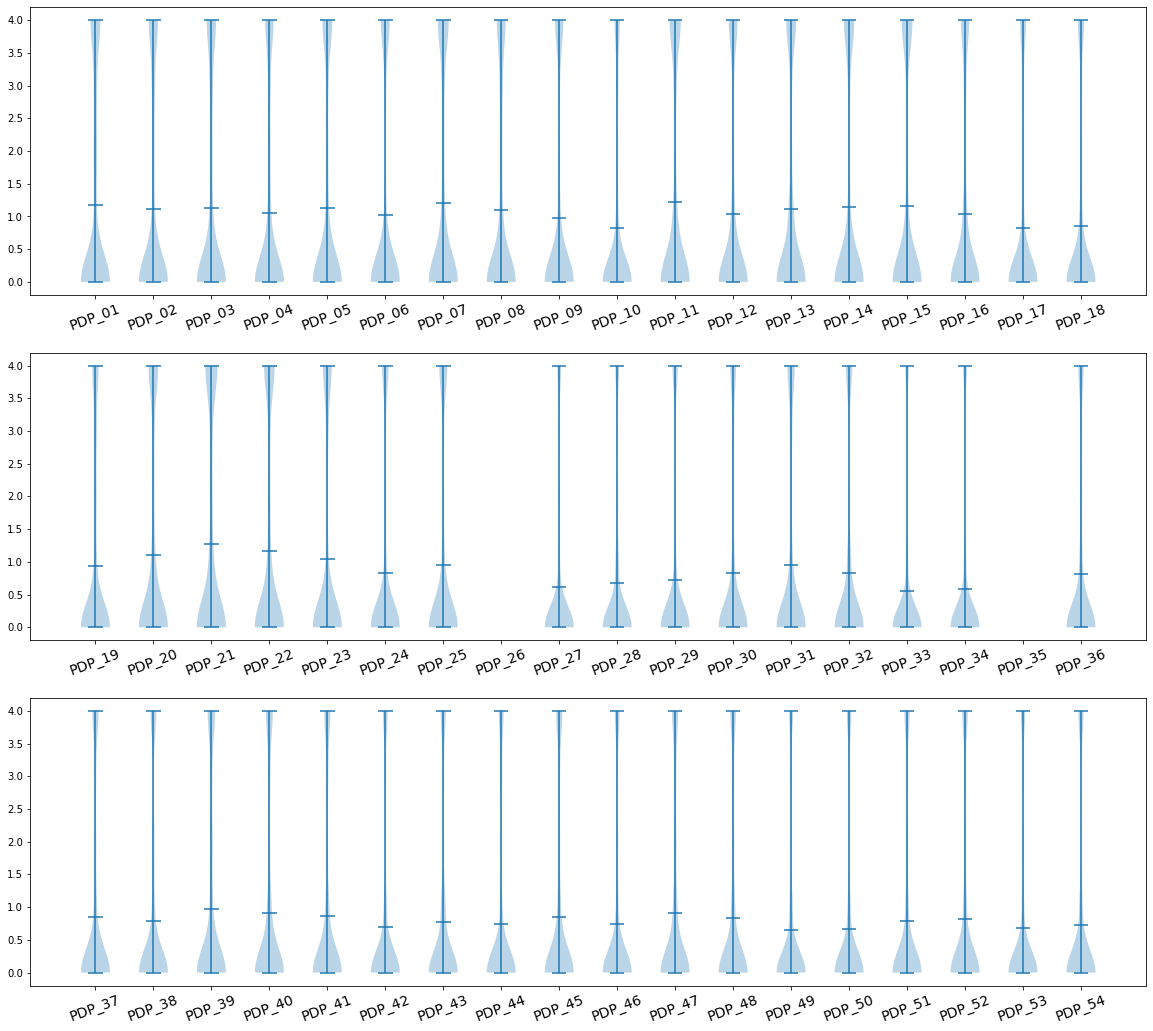


PDV


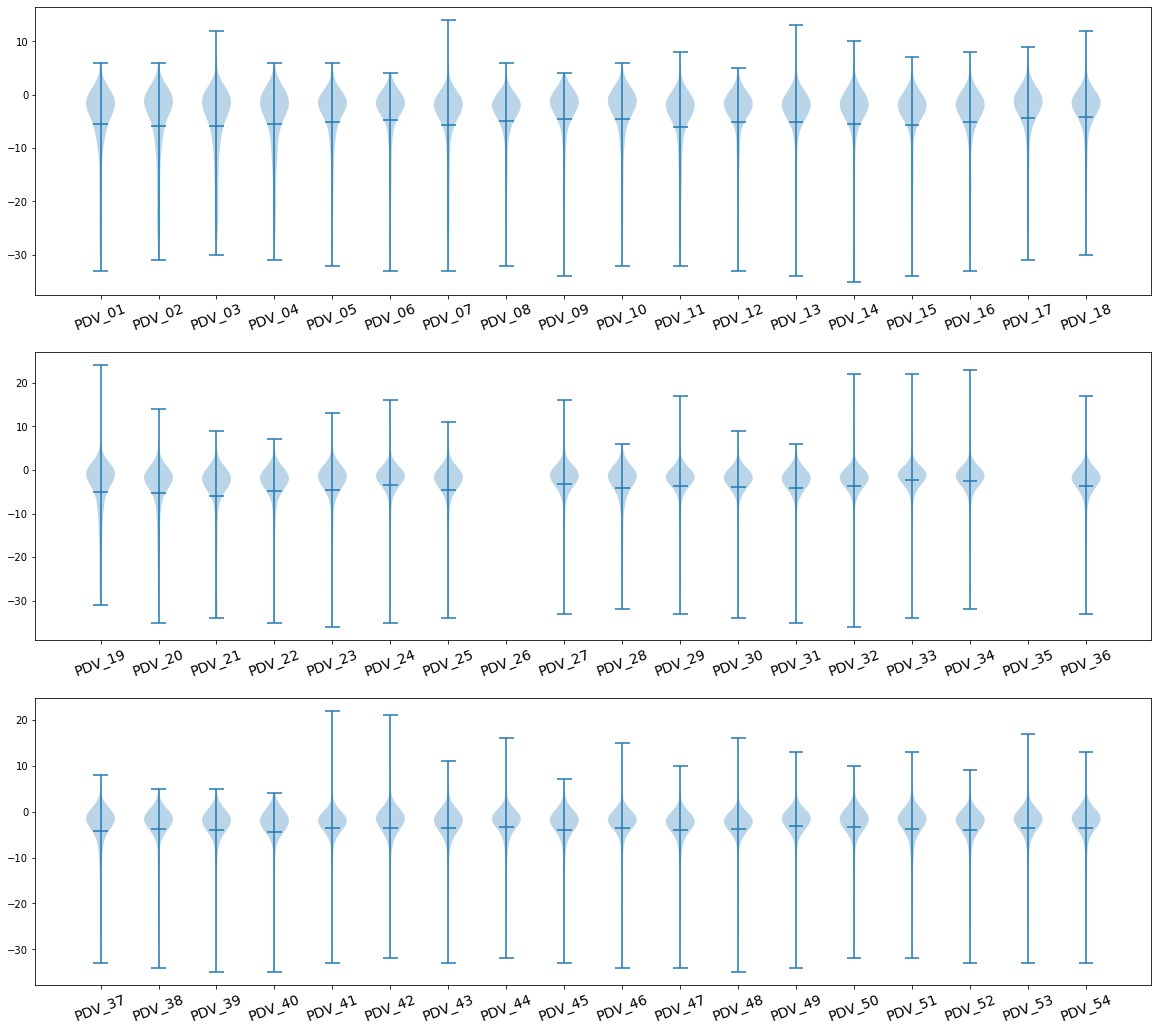


THV


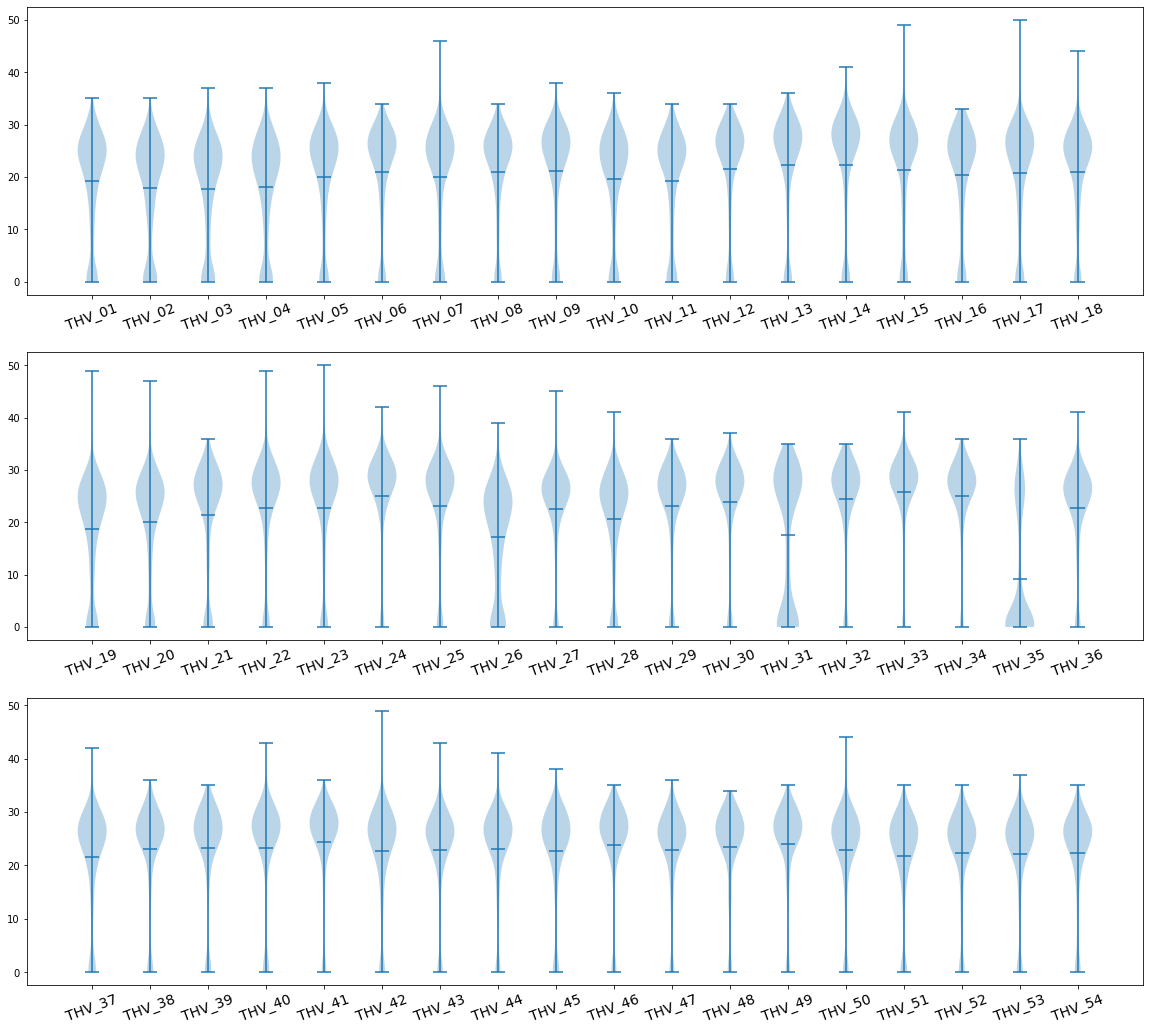


TDP


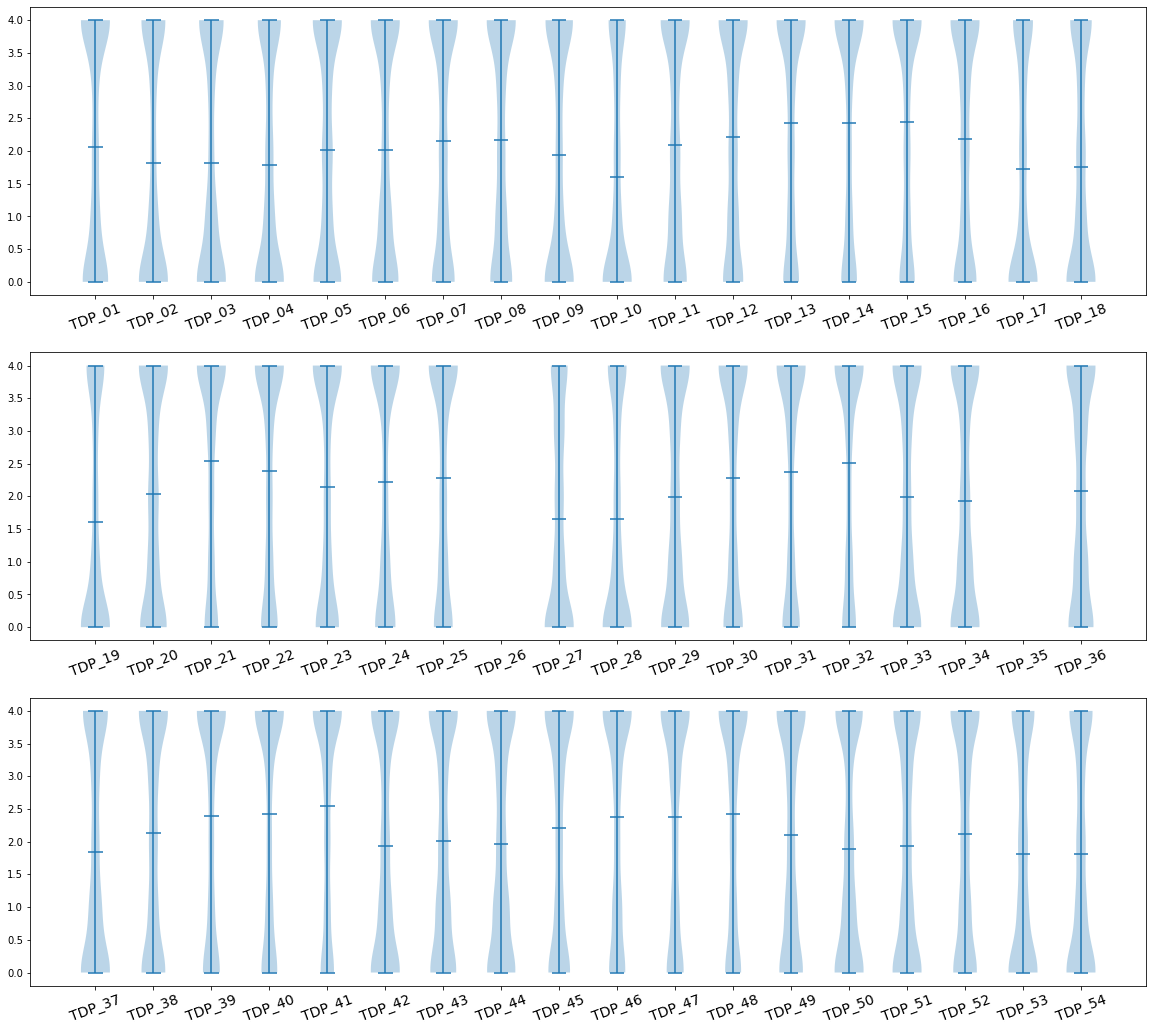


TDV


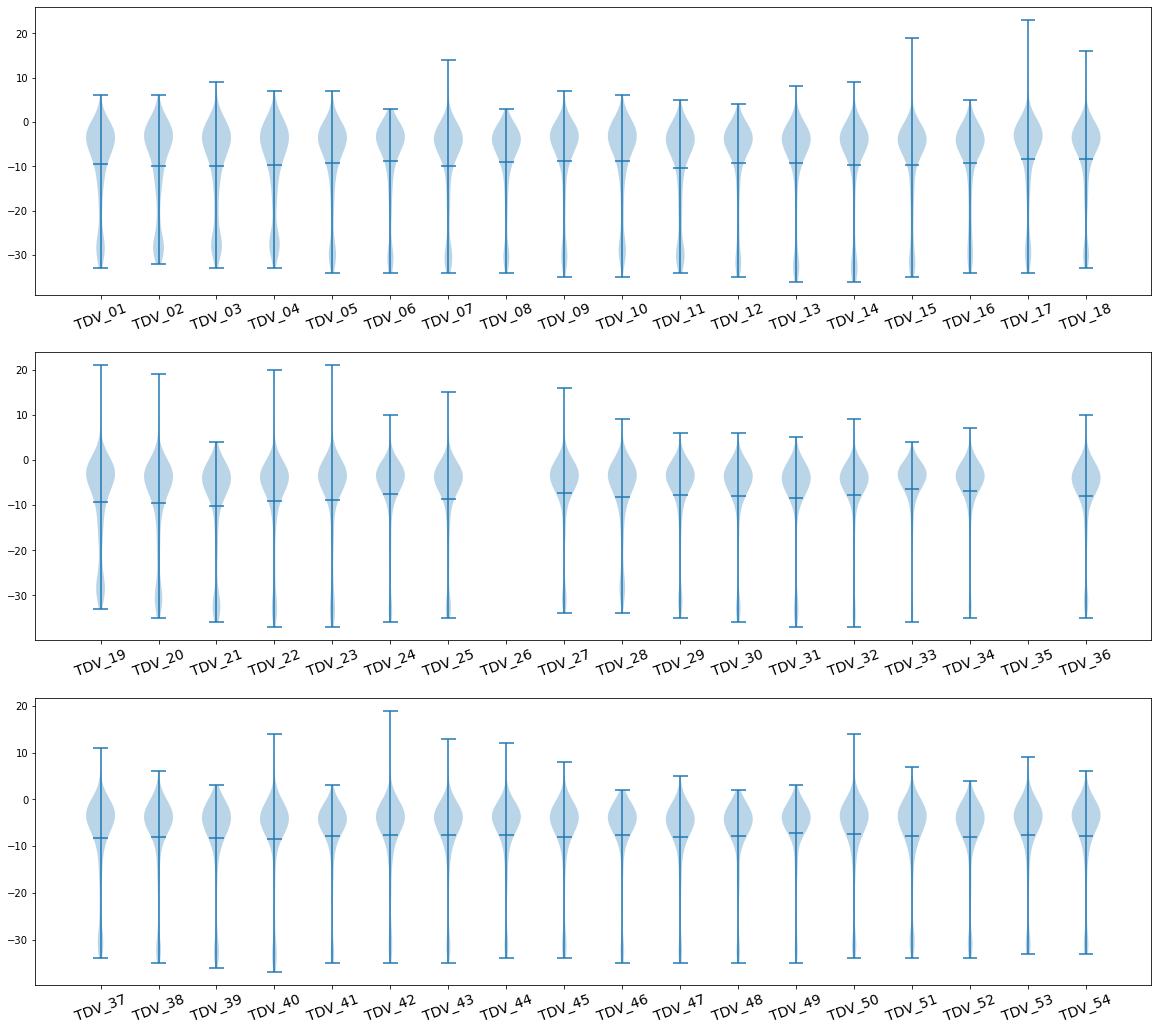

In [355]:
for m in range(len(check_list)):
    print()
    print(check_list[m])
    fig, axs = plt.subplots(3, 1, figsize = (20, 18))
    for k in range(0, 3):
        axs[k].violinplot([df_sam2.iloc[:, i] for i in range(17+18*k+54*m, 17+18*(k+1)+54*m)], showmeans = True)

        plt.sca(axs[k])
        plt.xticks([i for i in range(1, 19)], [df_sam2.columns[i] for i in range(17+18*k+54*m, 17+18*(k+1)+54*m)],
                   fontsize = 14, rotation=20)

    plt.show()

**3X3 그래프**

In [8]:
# for m in range(len(check_list)):
#     print()
#     print(check_list[m])
#     fig, axs = plt.subplots(3, 3, figsize = (20, 18))
#     for k in range(0, 3):
#         for i in range(0, 3):
#             axs[k, i].violinplot([df_sam2.iloc[:, i] for i in range(17+6*i+18*k+54*m, 17+6*(i+1)+18*k+54*m)], showmeans = True)
            
#             plt.sca(axs[k, i])
#             plt.xticks([i for i in range(1, 7)], [df_sam2.columns[i] for i in range(17+6*i+18*k+54*m, 17+6*(i+1)+18*k+54*m)], rotation=20)

#     plt.show()

### 특이값이 3개 있었던 THV를 우선적으로 살펴봄
* 26, 31, 35번 point가 특이하다

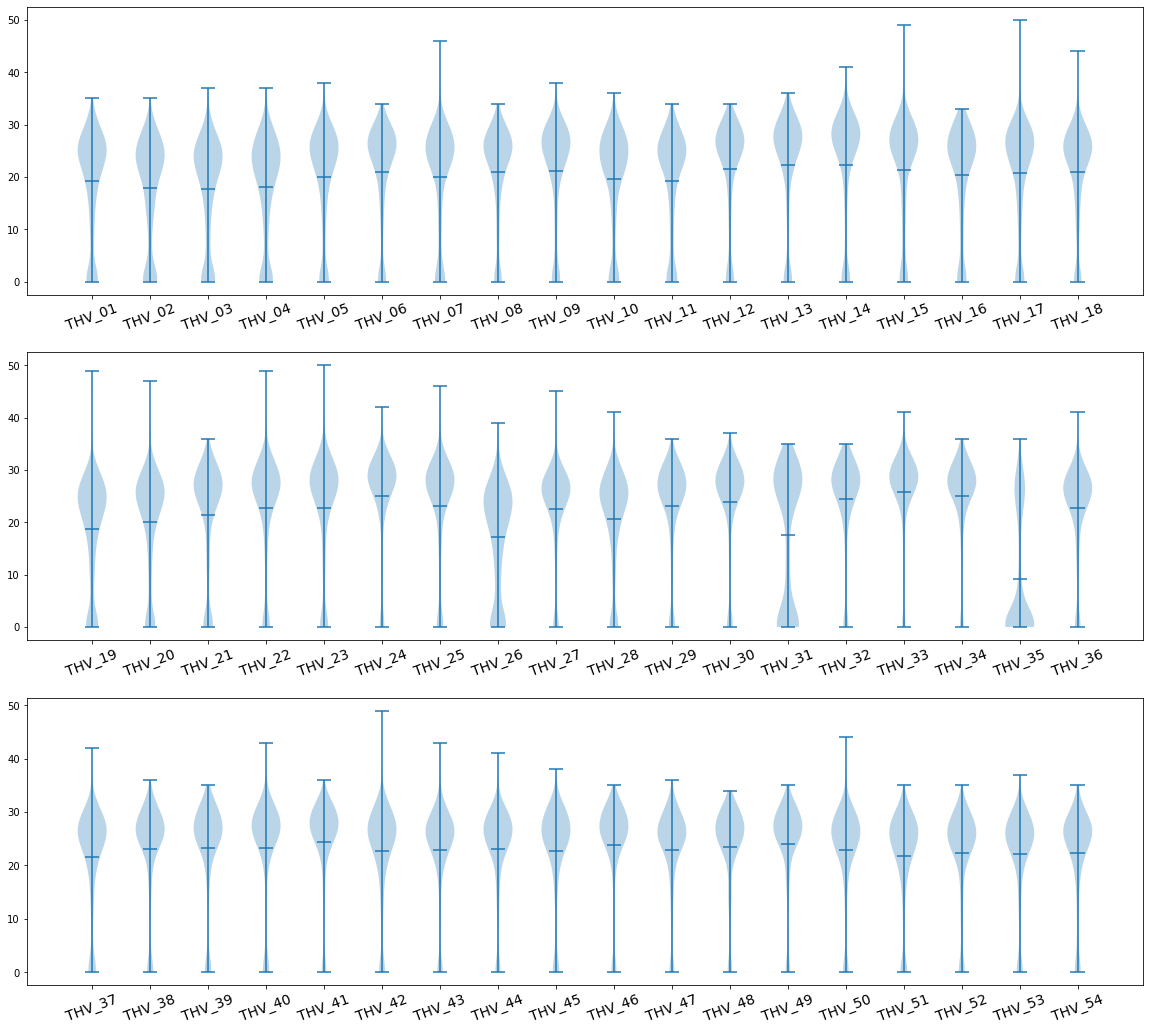

In [9]:
fig, axs = plt.subplots(3, 1, figsize = (20, 18))
for k in range(0, 3):
    axs[k].violinplot([df_sam2.iloc[:, i] for i in range(17+18*k+108, 17+18*(k+1)+108)], showmeans = True)

    plt.sca(axs[k])
    plt.xticks([i for i in range(1, 19)], [df_sam2.columns[i] for i in range(17+18*k+108, 17+18*(k+1)+108)],
               fontsize = 14, rotation=20)

plt.show()

26번 Point를 관찰하기 위해 주위의 8개의 값과 함께 비교해봄

In [61]:
see_26 = df_sam2[['PID','AGE','Eye','THV_16','THV_17','THV_18','THV_25','THV_26','THV_27','THV_34','THV_35','THV_36']]

26번과 35번의 경우 같은 사람임에도 상이한 결과값이 나오는 경우가 많았음. 맹점이므로 제대로 검사가 이루어지지 않는다고 판단
31번을 더 알아보자

1


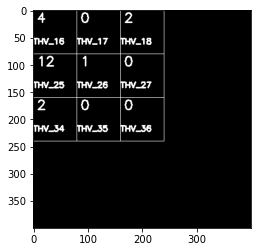

2


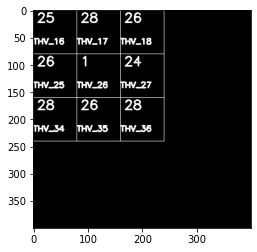

2


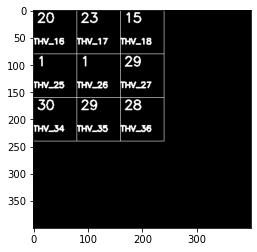

In [143]:
for j in range(0, 3):
    want_see = pd.DataFrame(see26_0.iloc[j]).T
    img = np.zeros((400, 400, 3), np.uint8)
    print(pd.DataFrame(see_26.iloc[j]).T.iloc[0,0])
    for i in range(9):
        if i<3:
            n=0
            point1 = 0 + 80 * i, 80*n
            point2 = 80 + 80 * i, 80*(n+1)
            point3 = 7 + 80 * i, 80*n+22
            point4 = 80 * i, 80*n+62
            img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
            img = cv2.putText(img, str(want_see.iloc[0, i+3]), point3, 16, 0.8, (255,255,255),
                                 thickness = 2)
            img = cv2.putText(img, want_see.columns[i+3], point4, 16, 0.5, (255,255,255),
                                 thickness = 2)

        elif 3<=i<6:
            n=1
            point1 = 0 + 80 * (i-3), 80*n
            point2 = 80 + 80 * (i-3), 80*(n+1)
            point3 = 7 + 80 * (i-3), 80*n+22
            point4 = 80 * (i-3), 80*n+62
            img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
            img = cv2.putText(img, str(want_see.iloc[0, i+3]), point3, 16, 0.8, (255,255,255),
                                 thickness = 2)
            img = cv2.putText(img, want_see.columns[i+3], point4, 16, 0.5, (255,255,255),
                                 thickness = 2)

        elif 6<=i:
            n=2
            point1 = 0 + 80 * (i-6), 80*n
            point2 = 80 + 80 * (i-6), 80*(n+1)
            point3 = 7 + 80 * (i-6), 80*n+22
            point4 = 80 * (i-6), 80*n+62
            img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
            img = cv2.putText(img, str(want_see.iloc[0, i+3]), point3, 16, 0.8, (255,255,255),
                                 thickness = 2)

            img = cv2.putText(img, want_see.columns[i+3], point4, 16, 0.5, (255,255,255),
                                 thickness = 2)


    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)            
    plt.imshow(imgRGB)
    plt.show()

    # cv2.imshow(str(want_see.iloc[0, 0]), img)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

In [144]:
see_31 = df_sam2[['PID','AGE','Eye','THV_21','THV_22','THV_23','THV_30','THV_31','THV_32','THV_38','THV_39','THV_40']]

In [170]:
see_31.head(5)

,PID,AGE,Eye,THV_21,THV_22,THV_23,THV_30,THV_31,THV_32,THV_38,THV_39,THV_40
8,1,63,OS,0,10,2,17,18,7,15,11,12
9,2,51,OD,29,29,30,29,30,32,30,30,30
10,2,51,OS,29,29,29,29,31,32,31,31,33
11,2,52,OD,30,32,28,28,0,29,35,32,31
12,2,52,OS,30,30,31,30,0,30,31,30,32


* 31번 데이터를 보니 이상해보이는 값들이 너무 많음, 같은 나이대는 같은 일반인 평균을 가지고 있으므로 그것을 찾아서 비교해보겠다

1


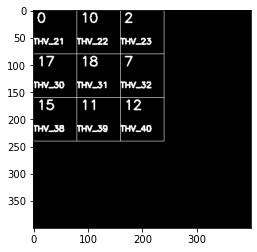

2


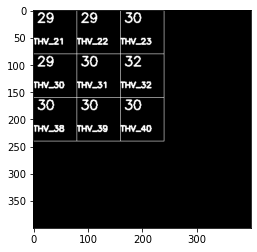

2


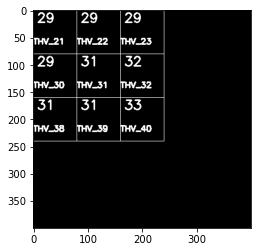

2


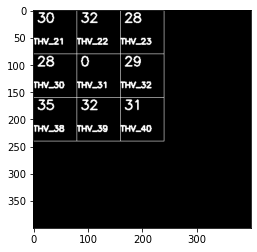

2


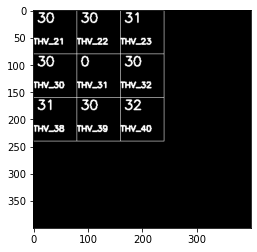

2


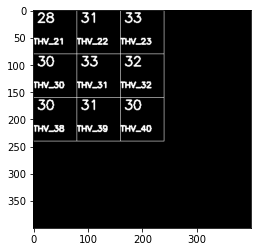

2


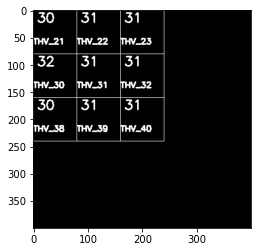

2


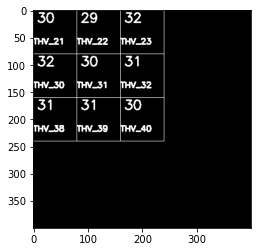

2


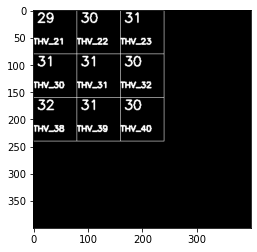

2


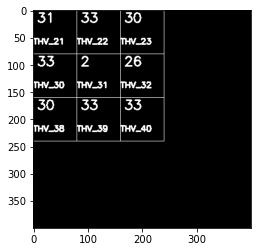

In [122]:
for j in range(0, 10):
    want_see = pd.DataFrame(see_31.iloc[j]).T
    img = np.zeros((400, 400, 3), np.uint8)
    print(pd.DataFrame(see_31.iloc[j]).T.iloc[0,0])
    for i in range(9):
        if i<3:
            n=0
            point1 = 0 + 80 * i, 80*n
            point2 = 80 + 80 * i, 80*(n+1)
            point3 = 7 + 80 * i, 80*n+22
            point4 = 80 * i, 80*n+62
            img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
            img = cv2.putText(img, str(want_see.iloc[0, i+3]), point3, 16, 0.8, (255,255,255),
                                 thickness = 2)
            img = cv2.putText(img, want_see.columns[i+3], point4, 16, 0.5, (255,255,255),
                                 thickness = 2)

        elif 3<=i<6:
            n=1
            point1 = 0 + 80 * (i-3), 80*n
            point2 = 80 + 80 * (i-3), 80*(n+1)
            point3 = 7 + 80 * (i-3), 80*n+22
            point4 = 80 * (i-3), 80*n+62
            img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
            img = cv2.putText(img, str(want_see.iloc[0, i+3]), point3, 16, 0.8, (255,255,255),
                                 thickness = 2)
            img = cv2.putText(img, want_see.columns[i+3], point4, 16, 0.5, (255,255,255),
                                 thickness = 2)

        elif 6<=i:
            n=2
            point1 = 0 + 80 * (i-6), 80*n
            point2 = 80 + 80 * (i-6), 80*(n+1)
            point3 = 7 + 80 * (i-6), 80*n+22
            point4 = 80 * (i-6), 80*n+62
            img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
            img = cv2.putText(img, str(want_see.iloc[0, i+3]), point3, 16, 0.8, (255,255,255),
                                 thickness = 2)

            img = cv2.putText(img, want_see.columns[i+3], point4, 16, 0.5, (255,255,255),
                                 thickness = 2)


    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)            
    plt.imshow(imgRGB)
    plt.show()

    # cv2.imshow(str(want_see.iloc[0, 0]), img)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

### 평균 데이터 생성

In [186]:
mean_list = ['mean'+str(i) for i in range(1,55)]

In [187]:
for i in range(len(mean_list)):
    df_sam2[mean_list[i]] = df_sam2.iloc[:,17+54*2+i] - df_sam2.iloc[:,17+54*4+i]

In [190]:
df_sam2.iloc[:,17+54*5:]

,mean1,mean2,mean3,mean4,mean5,mean6,mean7,mean8,mean9,mean10,mean11,mean12,mean13,mean14,mean15,mean16,mean17,mean18,mean19,mean20,mean21,mean22,mean23,mean24,mean25,mean26,mean27,mean28,mean29,mean30,mean31,mean32,mean33,mean34,mean35,mean36,mean37,mean38,mean39,mean40,mean41,mean42,mean43,mean44,mean45,mean46,mean47,mean48,mean49,mean50,mean51,mean52,mean53,mean54
8,27,29,26,28,30,29,31,31,30,30,30,29,31,33,33,30,31,28,26,31,33,32,32,34,31,NaN,29,28,29,31,32,33,32,32,NaN,29,29,30,31,32,32,31,30,30,31,31,33,33,31,30,31,31,29,30
9,27,27,27,27,29,29,30,29,29,29,29,31,32,32,32,31,30,29,28,30,31,32,33,33,32,NaN,30,27,29,31,33,33,33,33,NaN,30,30,31,33,32,32,32,31,30,30,31,31,31,31,31,29,30,30,30
10,27,28,28,27,29,30,30,30,29,29,29,31,31,32,31,30,30,29,27,30,31,33,33,33,32,NaN,30,28,30,31,32,33,32,32,NaN,30,29,31,32,32,33,31,31,30,30,31,32,31,31,30,30,30,30,30
11,32,27,28,29,29,30,29,30,32,27,30,31,32,33,31,28,27,30,29,28,31,30,29,33,32,NaN,30,32,33,32,2,31,32,28,NaN,31,30,31,30,30,32,27,29,32,32,33,29,31,33,30,31,32,29,29
12,31,27,27,29,30,30,29,31,32,27,29,32,32,33,31,28,27,30,29,28,31,30,29,33,32,NaN,30,32,33,32,0,32,33,28,NaN,31,31,31,30,30,32,27,29,31,33,33,29,31,32,30,31,31,29,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,31,32,33,33,33,34,33,31,33,35,33,27,27,31,29,28,33,33,30,33,31,31,31,34,34,NaN,33,33,34,33,21,14,32,34,NaN,32,32,32,32,32,31,31,30,31,32,33,34,34,29,31,30,32,33,33
4,33,29,29,31,31,32,30,32,35,29,31,33,33,34,32,30,28,31,31,30,35,31,31,34,33,NaN,33,33,34,34,24,24,35,32,NaN,33,32,31,31,31,34,30,31,33,34,35,31,32,33,31,32,33,31,31
7,31,32,33,33,33,34,33,31,33,35,33,29,27,31,29,29,32,33,30,33,32,31,30,34,33,NaN,33,33,35,34,19,15,33,35,NaN,32,32,32,31,31,31,31,30,30,31,33,34,35,29,31,30,31,32,32
5,29,30,31,31,30,32,33,29,31,32,32,26,27,29,29,28,31,31,30,33,32,31,31,34,34,NaN,32,33,34,34,33,31,30,37,NaN,31,32,32,31,31,31,31,30,30,31,33,34,35,29,30,30,32,32,33


In [230]:
df_sam2['mean35']

8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
      ..
3    NaN
4    NaN
7    NaN
5    NaN
6    NaN
Name: mean35, Length: 999, dtype: float64

* 나이대가 같으면 평균이 같아야함 / 데이터를 지켜보니 조금씩 차이가 있기에 의문점이 들지만 어느정도 오차는 용인한다
    * 너무 큰 경우는 데이터에 이상이 있는 것으로 판단

In [281]:
out_list = []
for i in list(df_sam2['AGE'].unique()):
    for j in df_sam2.columns[-54:].drop(['mean26','mean35']):
        if df_sam2[df_sam2['AGE']==i].groupby(j).size().index[-1]-df_sam2[df_sam2['AGE']==i].groupby(j).size().index[0] > 10:
            print(i,', ',j,', ',df_sam2[df_sam2['AGE']==i].groupby(j).size().index[-1]-df_sam2[df_sam2['AGE']==i].groupby(j).size().index[0])
            out_list.append(j)

63 ,  mean13 ,  11
63 ,  mean31 ,  33
63 ,  mean32 ,  38
63 ,  mean33 ,  30
63 ,  mean34 ,  22
51 ,  mean31 ,  32
52 ,  mean31 ,  36
53 ,  mean31 ,  30
54 ,  mean31 ,  35
55 ,  mean31 ,  46
55 ,  mean33 ,  22
56 ,  mean31 ,  38
56 ,  mean33 ,  26
58 ,  mean31 ,  31
64 ,  mean31 ,  33
65 ,  mean31 ,  32
65 ,  mean32 ,  23
65 ,  mean33 ,  22
28 ,  mean31 ,  49
28 ,  mean32 ,  25
28 ,  mean33 ,  12
28 ,  mean34 ,  23
41 ,  mean31 ,  32
43 ,  mean31 ,  30
77 ,  mean31 ,  27
77 ,  mean32 ,  14
57 ,  mean31 ,  30
74 ,  mean31 ,  35
74 ,  mean32 ,  46
74 ,  mean33 ,  45
74 ,  mean34 ,  14
75 ,  mean31 ,  31
76 ,  mean31 ,  28
76 ,  mean32 ,  11
69 ,  mean31 ,  35
69 ,  mean32 ,  12
69 ,  mean34 ,  12
70 ,  mean31 ,  30
71 ,  mean31 ,  31
72 ,  mean13 ,  11
72 ,  mean31 ,  38
72 ,  mean33 ,  18
72 ,  mean34 ,  19
20 ,  mean31 ,  27
20 ,  mean32 ,  15
20 ,  mean34 ,  13
80 ,  mean31 ,  18
73 ,  mean31 ,  31
73 ,  mean32 ,  29
21 ,  mean31 ,  36
21 ,  mean32 ,  18
21 ,  mean33 ,  12
59 ,  mean31

In [284]:
import collections
collections.Counter(out_list)

Counter({'mean13': 2, 'mean31': 51, 'mean32': 20, 'mean33': 14, 'mean34': 10})

In [165]:
see_31[see_31['AGE']==51]

,PID,AGE,Eye,THV_21,THV_22,THV_23,THV_30,THV_31,THV_32,THV_38,THV_39,THV_40
9,2,51,OD,29,29,30,29,30,32,30,30,30
10,2,51,OS,29,29,29,29,31,32,31,31,33
131,25,51,OD,23,15,25,29,0,27,30,30,30
137,25,51,OS,6,25,30,31,0,27,29,28,28
139,25,51,OS,0,24,29,29,0,29,27,30,26
141,25,51,OD,21,23,26,32,0,27,28,30,28
142,25,51,OD,14,26,25,31,0,27,30,30,27
562,130,51,OS,26,28,29,28,28,30,25,27,29
563,130,51,OD,27,28,29,28,30,30,28,28,29
780,190,51,OD,28,30,28,32,0,29,28,30,29
